In [143]:
#initial

import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from datetime import datetime
import math

words = pd.read_excel('dutch.xlsx',sheet_name='update')
words = words.loc[:,'word':]
lesson = pd.read_excel('dutch.xlsx',sheet_name='lesson')
lesson = lesson.loc[:,'lesson':]

In [49]:
#classes

class Words(object):
    def __init__(self, word, typ, translation, russian, example, example_translation, appear, trial_d, trial_r, success, weight):
        self.word = word
        self.typ = typ
        self.translation = translation
        self.example = example
        self.example_translation = example_translation
        self.russian = russian
        self.appear = appear
        self.trial_d = trial_d
        self.trial_r = trial_r
        self.success = success
        self.weight = weight
            
    def getTyp(self):
        return self.typ
    
    def getRussian(self):
        return self.russian
    
    def getExample(self):
        return self.example
    
    def changeType(self,new):
        self.typ = new
    
    def getTrials_d(self):
        return self.trial_d
    
    def getTrials_r(self):
        return self.trial_r
    
    def addTrials_d(self):
        self.trial_d += 1
        
    def addTrials_r(self):
        self.trial_r += 1
    
    def getAppear(self):
        return self.appear
    
    def addAppear(self):
        self.appear += 1
        return self.appear
       
    def addSuccess(self):
        self.success += 1
        return self.success   
    
    def getSuccess(self):
        return self.success
    
    def getWord(self):
        return self.word
    
    def getTranslation(self):
        return self.translation
    
    def getWeight(self):
        if self.trial_d == 0 and self.trial_r == 0:
            return self.weight
        else: 
            return 100 - (self.success/ (self.trial_d + self.trial_r)) * 100
        
    
    def __len__(self):
        return len(f'{self.word} -> {self.translation}')
    
    def __repr__(self):
        return f'{self.word}: {self.getTranslation()} , {self.getExample()}'
    
    def __str__(self):
        return f'{self.word} : {self.translation}'
    
    
class Lesson(object):
    def __init__(self, number):
        self.number = number
    def getNumber(self):
        return self.number
    def start(self, start):
        self.start = start
    def getStart(self):
        return self.start
    def inter(self, inter):
        self.inter = inter
    def getInter(self):
        return self.inter
    def finish(self, finish):
        self.finish = finish
    def getFinish(self):
        return self.finish
    def number_of_easy(self,easy):
        self.easy = easy
    def getNumber_of_easy(self):
        return self.easy
    def points(self, pts):
        self.pts = pts
    def add_pts(self, a_pts):
        self.pts += a_pts
    def getPoints(self):
        return self.pts + 1500 - int((self.finish - self.start).seconds)
    def wlist(self,list_of_words):
        self.list_of_words = list_of_words
    def getList(self):
        return self.list_of_words
    def length_of_lesson(self,lol):
        self.lol = lol
    def getLength_of_lesson(self):
        return self.lol

In [50]:
#defs

def loadWords(df_words, temp):
    wordList = []
    for i in range (len(words)):
        if temp == 'yes':
            wordList.append(Words(words.iloc[i,0],words.iloc[i,1],words.iloc[i,2],words.iloc[i,5], words.iloc[i,3],words.iloc[i,4],words.iloc[i,6],words.iloc[i,7],words.iloc[i,8],words.iloc[i,9],words.iloc[i,10]))
        else:
            wordList.append(Words(words.iloc[i,0],words.iloc[i,1],words.iloc[i,2],words.iloc[i,5], words.iloc[i,3],words.iloc[i,4],0,0,0,0, 100))       
    return wordList


def no_space(word):
    lst = []
    for w in word:
        lst.append(w.strip())
    return lst


def translation_with_comma(translation):
    try:
        translation = translation.split(',')
        translation = no_space(translation)
        return translation
    
    except:
        return [translation]
    
def help_for_guess(word, r): #r - number of letters
    list_of_word = list(word)
    copy = list_of_word.copy()
    for j in range(len(list_of_word)):
        if list_of_word[j] == ' ':
            copy.remove(list_of_word[j])
    
    l = random.sample(copy, k = r)
    
    for i in range(len(list_of_word)):
        if list_of_word[i] in l:
            list_of_word[i] = list_of_word[i]
        else:
            list_of_word[i] = '_'      
    back = ' '.join(list_of_word)
    
    return back


def rightword(word,translation,rever=0):
    point_counter = 0
    if rever == 1:
        b = 0
        while b == 0:
            x = input(f'[à ë ï é]\n\nPress "1","2","3" to open 1, 2, 3 letters in the word\n\n {translation}: ')
            if x == word:
                b = 1
                return [True, point_counter]
            elif x == '1' or x == '2' or x == '3':
                print(help_for_guess(word, int(x)))
                point_counter += int(x)
            else:
                return [False, point_counter]
                b = 1
    elif rever == 0:
        b = 0
        translation = translation_with_comma(translation)
        while b == 0:
            x = input(f'[à ë ï é]\n\nPress "1","2","3" to open 1, 2, 3 letters in the word\n\n {word}: ')
            if x in translation:
                b = 1
                return [True, point_counter]
            elif x == '1' or x == '2' or x == '3':
                print(help_for_guess(translation[0], int(x)))
                point_counter += int(x)
            else:
                b = 1
                return [False, point_counter]
    

def the_longest(sample_of_words):
    mx = 0
    for i in sample_of_words:
        if len(i) > mx:
            mx = len(i)
    return mx


def cycle(sample_of_words, rever):
    p = 250 
    s = sample_of_words.copy()
    while len(s) > 0:
        random.shuffle(s)
        lst_to_delete = []
        for i in s:
            temp = rightword(i.getWord(),i.getTranslation(),rever)
            if temp[0]:
                print("It's right!")
                p = p - temp[1]
                print(temp[1], p)
                i.addSuccess()
                if rever == 0:
                    i.addTrials_d()
                else:
                    i.addTrials_r()
                lst_to_delete.append(i)
            else:
                print("Shame on you!")
                p = p - temp[1]
                p -= 1
                print(p)
                if rever == 0:
                    i.addTrials_d()
                else:
                    i.addTrials_r()            
        if len(lst_to_delete) > 0:
            for w in lst_to_delete:
                s.remove(w)
            if len(s) != 0:
                plotting(s)
        else:
            if len(s) != 0:
                plotting(s)
            
            
    return p

def list_to_list(lst):
    st = ''
    for w in lst:
        st = st + w + '; '
    st.strip()       
    st = st[0:(len(st)-2)]
    return st

def lessonLenght(list_of_words):
    lessonLenght = 0
    for w in list_of_words:
        temp = w.getWord()
        temp = temp.replace(' ','')
        lessonLenght += len(temp)
    return lessonLenght

def random_sample(list_of_words, n):
    sample = random.choices(list_of_words, weights = [w.getWeight() for w in list_of_words], k = n )
    l = len(sample)
    st = 0
    count = 0
    while l != st:
        st = len(set(sample))
        sample = random.choices(list_of_words, weights = [w.getWeight() for w in list_of_words], k = n )
        count += 1
    print(count)
    
    return sample

In [51]:
#object creation
exist = 'yes'
wordList = loadWords(words,exist)
sample = random_sample(wordList,25)   

1


In [18]:
data_words_lesson_df = lesson
data_words_lesson_df = data_words_lesson_df.loc[:, ['points', 'r']]
data_words_lesson_df = data_words_lesson_df.sort_values(by='points', ascending=False, ignore_index=True)
mask = data_words_lesson_df.duplicated(subset='r', keep='first')
df = data_words_lesson_df[~mask]
df = df.reset_index(drop = True)
sml = df.nsmallest(5, columns = 'points')
sml.rename(columns={"points": "lesson/points"}, inplace = True)
sml.set_index("r", inplace = True)
#lst = sml['r'].to_list()
dct = sml.to_dict()
print('anti TOP5 lessons:', dct)

In [37]:
sml = df.nsmallest(5, columns = 'points')
sml.rename(columns={"points": "lesson/points"}, inplace = True)
sml.set_index("r", inplace = True)
#lst = sml['r'].to_list()
d = sml.to_dict()
print('anti TOP5 lessons:', d)

anti TOP5 lessons: {'lesson/points': {92: 619, 74: 835, 67: 842, 40: 853, 13: 925}}


In [25]:
print(sml['r'].to_list())

[92, 74, 67, 40, 13]


In [28]:
print('anti TOP5 lessons:', lst)

anti TOP5 lessons: [92, 74, 67, 40, 13]


In [30]:
sml.set_index()
sml.to_dict()

{'points': {104: 619, 103: 835, 102: 842, 101: 853, 100: 925},
 'r': {104: 92, 103: 74, 102: 67, 101: 40, 100: 13}}

In [101]:
lesson

,lesson,start,inter,finish,known,points,length,time,list_of_words,r
0,1,2022-11-26 21:14:16.069,2022-11-26 21:24:14.423,2022-11-26 21:31:48.654,6,877,184,1052,krapte; argument; jouw; achterwerk; broedstoof...,1
1,2,2022-11-27 02:30:31.842,2022-11-27 02:41:47.490,2022-11-27 02:49:34.282,8,803,185,1142,aanranden; fiks; middel; kroeshaar; plezant; a...,2
2,3,2022-11-27 13:24:02.594,2022-11-27 13:35:42.708,2022-11-27 13:42:12.905,8,865,204,1090,reis; betekenis; naast zitten; gewoon; voortaa...,3
3,4,2022-11-27 22:23:03.719,2022-11-27 22:34:28.615,2022-11-27 22:45:14.736,7,580,217,1331,recept; opzichtig; bloed; militair; verzuimen;...,4
4,5,2022-11-28 17:44:21.460,2022-11-28 17:52:57.397,2022-11-28 17:58:23.277,5,1115,191,841,Romeins; storten; half; alsnog; zuchten; rein;...,5
...,...,...,...,...,...,...,...,...,...,...
191,192,2023-02-21 19:47:27.499,2023-02-21 19:51:53.905,2023-02-21 19:57:51.967,25,1329,206,624,steekpenningen; gestaag; ultiem; oma; gevogelt...,143
192,193,2023-02-22 22:58:31.806,2023-02-22 23:04:11.132,2023-02-22 23:08:48.302,15,1371,215,616,respecteren; zich verheugen op; weten; stijl; ...,145
193,194,2023-03-13 20:58:59.383,2023-03-13 21:04:41.486,2023-03-13 21:09:13.568,10,1366,204,614,bewusteloos; gloeien; koppeling; handeling; ka...,146
194,195,2023-03-15 22:03:51.933,2023-03-15 22:10:32.034,2023-03-15 22:17:06.317,25,1139,188,794,uitgeverij; derhalve; kap; typerend; beslissen...,75


In [136]:
def words_progress(df):

    lesson = df.copy()
    # extraction necessary information only - date of lesson finish and list of words
    data_words_lesson_df = lesson.loc[:, ['finish', 'list_of_words']]
    data_words_lesson_df['date'] = data_words_lesson_df['finish'].apply(lambda x: x.strftime("%d.%m.%Y"))
    data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'list_of_words']]
    data_words_lesson_df['date'] = pd.to_datetime(data_words_lesson_df['date'], format='%d.%m.%Y')
    
    start_date = data_words_lesson_df.loc[0,'date']
    end_date = data_words_lesson_df['date'].iloc[-1]
    
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    df_dates = pd.DataFrame(date_range, columns=['date'])
    data_words_lesson_df = pd.merge(df_dates, data_words_lesson_df, on='date', how='left')
    data_words_lesson_df['list_of_words'].fillna(0, inplace=True)
    
    
    data_words_lesson_df['total_words'] = 0
    

    # list for unique learned words
    new_learned_words = list()

    # determination quantity of unique words learned up to date
    for i in range(len(data_words_lesson_df)):
        if data_words_lesson_df.loc[i, 'list_of_words'] != 0:
            temp = data_words_lesson_df.loc[i, 'list_of_words'].split(";")
            for cw in temp:
                if cw.strip() not in new_learned_words:
                    new_learned_words.append(cw.strip())
            data_words_lesson_df.loc[i, 'total_words'] = len(new_learned_words)
        else:
            data_words_lesson_df.loc[i, 'total_words'] = len(new_learned_words)
    

    # extraction necessary information only - date and quantity of unique words, keeping only final number per day
    data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'total_words']]
    mask = data_words_lesson_df.duplicated(subset='date', keep='last')
    df = data_words_lesson_df[~mask]
    df = df.reset_index(drop=True)


    # plotting results on a graph
    plt.figure()
    plt.get_current_fig_manager().set_window_title('Words per Date')
    plt.bar(df['date'], df['total_words'], color='orange')
    plt.grid(linestyle='--', color='blue', alpha=.3)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Words Total')
    

    # addition values to bars, I add quantity of new words learned day by day

    current_time = datetime.now().strftime("%d_%m_%Y")

    #plt.savefig(f'data_files/words_graph/words_graph_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.show()

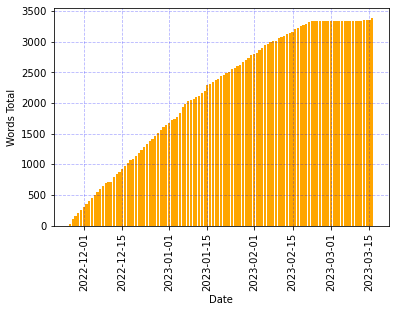

In [137]:
words_progress(lesson)

In [116]:
df

,date,total_words
0,2022-11-26,25
1,2022-11-27,100
2,2022-11-28,149
3,2022-11-29,199
4,2022-11-30,248
...,...,...
106,2023-03-12,3337
107,2023-03-13,3357
108,2023-03-14,3357
109,2023-03-15,3357


In [43]:
lesson_ = lesson.copy()
# extraction necessary information only - date of lesson finish and list of words
data_words_lesson_df = lesson_.loc[:, ['finish', 'list_of_words']]
data_words_lesson_df['date'] = data_words_lesson_df['finish'].apply(lambda x: x.strftime("%d.%m.%Y"))
data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'list_of_words']]
data_words_lesson_df['total_words'] = 0
data_words_lesson_df['date'] = pd.to_datetime(data_words_lesson_df['date'], format='%d.%m.%Y')

In [45]:
df_values = data_words_lesson_df.copy()

start_date = df_values.loc[0,'date']
end_date = df_values['date'].iloc[-1]


date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_dates = pd.DataFrame(date_range, columns=['date'])
df_merged = pd.merge(df_dates, df_values, on='date', how='left')
df_merged['list_of_words'].fillna(0, inplace=True)
df_merged['total_words'].fillna(0, inplace=True)

In [46]:
df_merged.tail(10)

,date,list_of_words,total_words
207,2023-03-07,0,0.0
208,2023-03-08,0,0.0
209,2023-03-09,0,0.0
210,2023-03-10,0,0.0
211,2023-03-11,0,0.0
212,2023-03-12,0,0.0
213,2023-03-13,bewusteloos; gloeien; koppeling; handeling; ka...,0.0
214,2023-03-14,0,0.0
215,2023-03-15,uitgeverij; derhalve; kap; typerend; beslissen...,0.0
216,2023-03-16,intelligent; oost; innemen; opening; kerstman;...,0.0


In [20]:
df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           181 non-null    datetime64[ns]
 1   list_of_words  181 non-null    object        
 2   total_words    181 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.4+ KB


In [25]:
start_date = '2022-11-26'
end_date = '2022-02-16'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [31]:
lesson

,lesson,start,inter,finish,known,points,length,time,list_of_words,r
0,1,2022-11-26 21:14:16.069,2022-11-26 21:24:14.423,2022-11-26 21:31:48.654,6,877,184,1052,krapte; argument; jouw; achterwerk; broedstoof...,1
1,2,2022-11-27 02:30:31.842,2022-11-27 02:41:47.490,2022-11-27 02:49:34.282,8,803,185,1142,aanranden; fiks; middel; kroeshaar; plezant; a...,2
2,3,2022-11-27 13:24:02.594,2022-11-27 13:35:42.708,2022-11-27 13:42:12.905,8,865,204,1090,reis; betekenis; naast zitten; gewoon; voortaa...,3
3,4,2022-11-27 22:23:03.719,2022-11-27 22:34:28.615,2022-11-27 22:45:14.736,7,580,217,1331,recept; opzichtig; bloed; militair; verzuimen;...,4
4,5,2022-11-28 17:44:21.460,2022-11-28 17:52:57.397,2022-11-28 17:58:23.277,5,1115,191,841,Romeins; storten; half; alsnog; zuchten; rein;...,5
...,...,...,...,...,...,...,...,...,...,...
176,177,2023-02-14 19:57:55.740,2023-02-14 20:01:55.892,2023-02-14 20:05:33.174,25,1524,230,457,appartement; scoren; hanenkam; mest; kunstmati...,41
177,178,2023-02-14 20:13:24.865,2023-02-14 20:18:17.359,2023-02-14 20:23:42.215,12,1346,197,617,vals; overslaan; bevredigend; bedenken; lading...,136
178,179,2023-02-15 23:17:57.193,2023-02-15 23:26:41.916,2023-02-15 23:33:36.427,7,961,210,939,gruwelijkheid; boosheid; overig; coltrui; neer...,137
179,180,2023-02-16 16:22:33.775,2023-02-16 16:25:53.008,2023-02-16 16:29:26.725,25,1564,210,412,gruwelijkheid; boosheid; overig; coltrui; neer...,137


In [65]:
data_words_lesson_df = lesson.copy()

data_words_lesson_df = lesson.loc[:, ['finish', 'list_of_words']]
data_words_lesson_df['date'] = data_words_lesson_df['finish'].apply(lambda x: x.strftime("%d.%m.%Y"))
data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'list_of_words']]
data_words_lesson_df['date'] = pd.to_datetime(data_words_lesson_df['date'], format='%d.%m.%Y')
    
start_date = data_words_lesson_df.loc[0,'date']
end_date = data_words_lesson_df['date'].iloc[-1]
    
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_dates = pd.DataFrame(date_range, columns=['date'])
data_words_lesson_df = pd.merge(df_dates, data_words_lesson_df, on='date', how='left')
data_words_lesson_df['list_of_words'].fillna(0, inplace=True)

data_words_lesson_df['total_words'] = 0
    

    
new_learned_words = list()

    # determination quantity of unique words learned up to date
for i in range(len(data_words_lesson_df)):
    if data_words_lesson_df.loc[i, 'list_of_words'] != 0:
        temp = data_words_lesson_df.loc[i, 'list_of_words'].split(";")
        for cw in temp:
            if cw.strip() not in new_learned_words:
                new_learned_words.append(cw.strip())
            data_words_lesson_df.loc[i, 'total_words'] = len(new_learned_words)
    else:
        data_words_lesson_df.loc[i, 'total_words'] = len(new_learned_words)

In [66]:
data_words_lesson_df

,date,list_of_words,total_words
0,2022-11-26,krapte; argument; jouw; achterwerk; broedstoof...,25
1,2022-11-27,aanranden; fiks; middel; kroeshaar; plezant; a...,50
2,2022-11-27,reis; betekenis; naast zitten; gewoon; voortaa...,75
3,2022-11-27,recept; opzichtig; bloed; militair; verzuimen;...,100
4,2022-11-28,Romeins; storten; half; alsnog; zuchten; rein;...,124
...,...,...,...
212,2023-03-12,0,3337
213,2023-03-13,bewusteloos; gloeien; koppeling; handeling; ka...,3357
214,2023-03-14,0,3357
215,2023-03-15,uitgeverij; derhalve; kap; typerend; beslissen...,3357


In [180]:
def words_progress(df):

    lesson = df.copy()
    # extraction necessary information only - date of lesson finish and list of words
    data_words_lesson_df = lesson.loc[:, ['finish', 'list_of_words']]
    data_words_lesson_df['date'] = data_words_lesson_df['finish'].apply(lambda x: x.strftime("%d/%m/%Y"))
    data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'list_of_words']]
    data_words_lesson_df['date'] = pd.to_datetime(data_words_lesson_df['date'], format='%d/%m/%Y')
    
    start_date = data_words_lesson_df.loc[0,'date']
    end_date = data_words_lesson_df['date'].iloc[-1]
    
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    df_dates = pd.DataFrame(date_range, columns=['date'])
    data_words_lesson_df = pd.merge(df_dates, data_words_lesson_df, on='date', how='left')
    
    data_words_lesson_df['list_of_words'].fillna(0, inplace=True)
    
    
    data_words_lesson_df['total_words'] = 0
    
    
    

    # list for unique learned words
    new_learned_words = list()

    # determination quantity of unique words learned up to date
    for i in range(len(data_words_lesson_df)):
        if data_words_lesson_df.loc[i, 'list_of_words'] != 0:
            temp = data_words_lesson_df.loc[i, 'list_of_words'].split(";")
            for cw in temp:
                if cw.strip() not in new_learned_words:
                    new_learned_words.append(cw.strip())
            data_words_lesson_df.loc[i, 'total_words'] = len(new_learned_words)
        else:
            data_words_lesson_df.loc[i, 'total_words'] = len(new_learned_words)
    
    

    # extraction necessary information only - date and quantity of unique words, keeping only final number per day
    data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'total_words']]
    mask = data_words_lesson_df.duplicated(subset='date', keep='last')
    
    
    
    df = data_words_lesson_df[~mask]
    
    
    
    
    
    df = df.reset_index()
    
    
    df['date'] = df['date'].dt.strftime('%d.%m.%Y')
    
    writer = pd.ExcelWriter('xxxxx.xlsx', engine='xlsxwriter')
    df.to_excel(writer, sheet_name='update')
    writer.save()
    
    #return df

    # plotting results on a graph
    plt.figure(figsize=(16, 10), dpi=80)
    #plt.get_current_fig_manager().set_window_title('Words per Date')
    plt.bar(df['date'], df['total_words'], color='orange')
    plt.grid(linestyle='--', color='blue', alpha=.3)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Words Total')

    # addition values to bars, I add quantity of new words learned day by day
    for i in range(len(df)):
        print(i)
        if i == 0:
            plt.text(x=i, y=df.loc[i, 'total_words'], s=df.loc[i, 'total_words'], ha='center', va='bottom',
                     color='black', size=8)
        else:
            plt.text(x=i, y=df.loc[i, 'total_words'], s=df.loc[i, 'total_words'] - df.loc[i - 1, 'total_words'],
                     ha='center', va='bottom', color='black', size=8)

    current_time = datetime.now().strftime("%d_%m_%Y")

    #plt.savefig(f'data_files/words_graph/words_graph_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


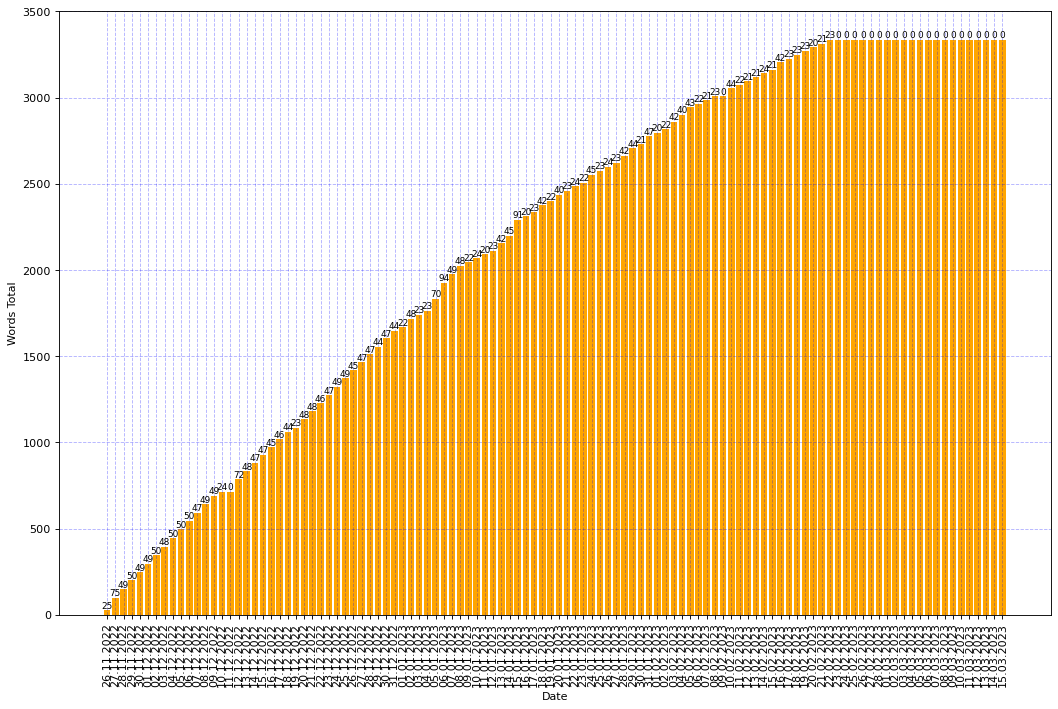

In [181]:
words_progress(lesson)

In [176]:
def words_progress(df):

    lesson = df.copy()
    # extraction necessary information only - date of lesson finish and list of words
    data_words_lesson_df = lesson.loc[:, ['finish', 'list_of_words']]
    data_words_lesson_df['date'] = data_words_lesson_df['finish'].apply(lambda x: x.strftime("%d.%m.%Y"))
    data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'list_of_words']]
    data_words_lesson_df['total_words'] = 0

    # list for unique learned words
    new_learned_words = list()

    # determination quantity of unique words learned up to date
    for i in range(len(data_words_lesson_df)):
        temp = data_words_lesson_df.loc[i, 'list_of_words'].split(";")
        for cw in temp:
            if cw.strip() not in new_learned_words:
                new_learned_words.append(cw.strip())
        data_words_lesson_df.loc[i, 'total_words'] = len(new_learned_words)

    # extraction necessary information only - date and quantity of unique words, keeping only final number per day
    data_words_lesson_df = data_words_lesson_df.loc[:, ['date', 'total_words']]
    mask = data_words_lesson_df.duplicated(subset='date', keep='last')
    df = data_words_lesson_df[~mask]
    df = df.reset_index()
    
    writer = pd.ExcelWriter('xxxxx2.xlsx', engine='xlsxwriter')
    df.to_excel(writer, sheet_name='update')
    writer.save()

    # plotting results on a graph
    plt.figure(figsize=(16, 10), dpi=80)
    plt.get_current_fig_manager().set_window_title('Words per Date')
    plt.bar(df['date'], df['total_words'], color='orange')
    plt.grid(linestyle='--', color='blue', alpha=.3)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Words Total')

    # addition values to bars, I add quantity of new words learned day by day

    for i in range(len(df)):
        if i == 0:
            plt.text(x=i, y=df.loc[i, 'total_words'], s=df.loc[i, 'total_words'], ha='center', va='bottom',
                     color='black', size=8)
        else:
            plt.text(x=i, y=df.loc[i, 'total_words'], s=df.loc[i, 'total_words'] - df.loc[i - 1, 'total_words'],
                     ha='center', va='bottom', color='black', size=8)

    current_time = datetime.now().strftime("%d_%m_%Y")

    #plt.savefig(f'data_files/words_graph/words_graph_{current_time}.png', dpi=300, bbox_inches='tight')
    plt.show()

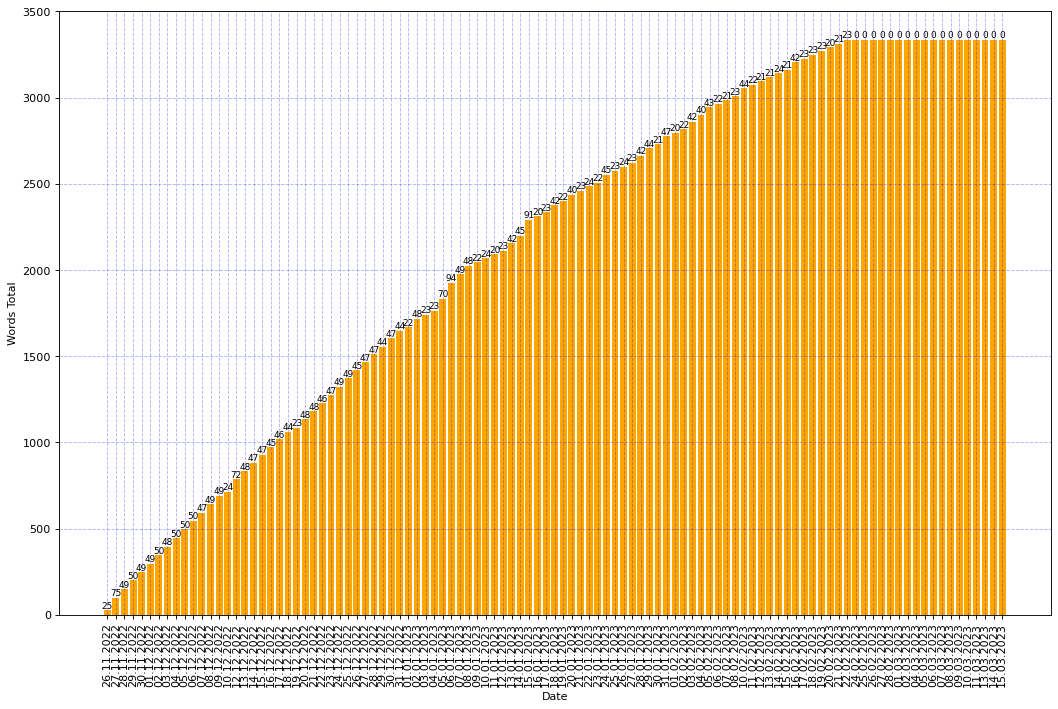

In [177]:
words_progress(lesson)